# AutoData workspace

In [1]:
import autodata as ad
%load_ext autoreload
%autoreload 2

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read data

In [2]:
input_file = 'data/adult.csv' #'data/wine.csv'
data = ad.read_csv(input_file, sep=',') #';')

In [3]:
data.get_data('header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.set_class(['age', 'fnlwgt']) #['income', 'gender']) #('quality')
data.train_test_split()

In [5]:
data.get_data('X_header')
data.get_data('categorical_header')
#data.get_data('y_test')
#data.get_data('numerical_header')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


### Processings

In [6]:
data = data.imputation()
data = data.encoding('label', 'categorical')
data = data.normalization('min-max')

### Visualization

y set plot


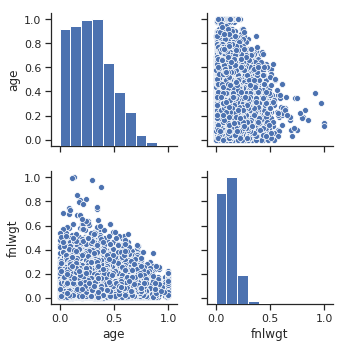

In [7]:
data.plot('y')

In [8]:
data.pca()

Explained variance ratio of the 15 components: 
 [0.31302031 0.17102878 0.09548836 0.07228105 0.06819642 0.05338766
 0.04731688 0.03462965 0.03388277 0.0303405  0.02812643 0.02080058
 0.01446719 0.01189401 0.00513941]


(PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 array([[ 0.08596983, -0.46519681, -0.07993838, ...,  0.03230784,
         -0.01027039,  0.01054716],
        [-0.2669868 , -0.40255758,  0.11929802, ...,  0.07847153,
         -0.01939772, -0.0667407 ],
        [-0.73929975,  0.40935729, -0.19690773, ..., -0.06247539,
         -0.06625995,  0.09054927],
        ...,
        [ 0.90868955,  0.14149046,  0.31864439, ...,  0.11876059,
         -0.03577643, -0.01079154],
        [ 0.09665796, -0.38851175,  0.36508652, ..., -0.17954733,
          0.00833109, -0.00235595],
        [ 0.3574258 ,  1.19582682,  0.18829436, ...,  0.02058079,
          0.03839626,  0.07311099]]))

In [9]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.483805,0.120004,0.685895,0.605206,0.436458,0.469836,0.288657,0.917013,0.668482,0.054766,0.022797,0.414702,0.896326,0.239282
std,0.187815,0.183029,0.071445,0.258299,0.171398,0.251284,0.302179,0.320430,0.211497,0.470764,0.197098,0.111163,0.129424,0.189643,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.500000,0.071216,0.600000,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.410526,0.951220,0.000000
50%,0.273973,0.500000,0.112210,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.410526,0.951220,0.000000
75%,0.424658,0.500000,0.152462,0.800000,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.463158,0.951220,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Benchmark

In [10]:
data.score()

0.30907549959981395